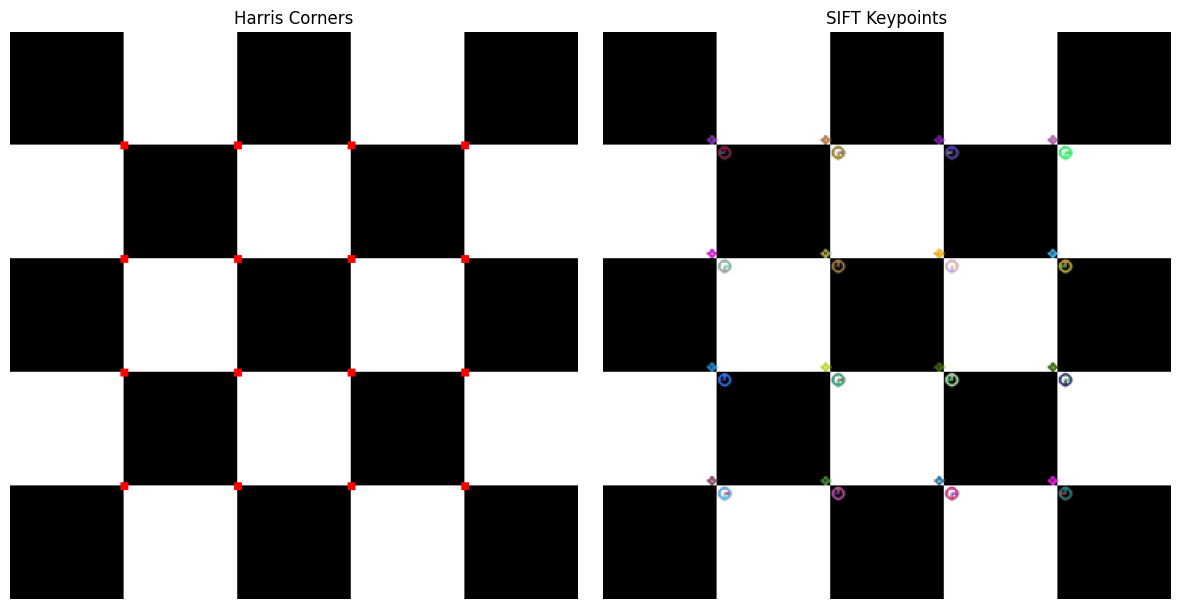

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('Assets/chessboard.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Harris Corner Detection ###
gray_float = np.float32(gray)
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate result for marking the corners
harris_dilated = cv2.dilate(harris_corners, None)

# Threshold to mark corners
img_harris = img.copy()
img_harris[harris_dilated > 0.01 * harris_dilated.max()] = [0, 0, 255]  # red corners

### SIFT Feature Detection ###
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

### Show Results ###
# Convert BGR to RGB for matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Harris Corners")
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("SIFT Keypoints")
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()